In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./povstat_processed.csv', names=['index', 'variable', 'year', 'province', 'value', 'adm_level', 'region', 'unit'], index_col="index", skiprows=1)

In [3]:
df.head()

,variable,year,province,value,adm_level,region,unit
index,,,,,,,
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


In [4]:
df.describe()

,year
count,3605.000000
mean,2006.600000
std,8.358192
min,1991.000000
25%,2006.000000
50%,2009.000000
75%,2012.000000
max,2015.000000


In [5]:
for cols in df.columns:
    print(df[cols].unique())

['Annual Per Capita Poverty Threshold (in Pesos)'
 'Poverty Incidence among Families (%)' 'Magnitude of Poor Families'
 'Poverty Incidence among Population (%)' 'Magnitude of Poor Population'
 'Subsistence Incidence among Population (%)'
 'Magnitude of Subsistence Poor Population']
[1991 2006 2009 2012 2015]
['1st District' '2nd District' '3rd District' '4th District' 'ARMM' 'Abra'
 'Agusan del Norte' 'Agusan del Sur' 'Aklan' 'Albay' 'Antique' 'Apayao'
 'Aurora' 'Basilan' 'Bataan' 'Batanes' 'Batangas' 'Benguet' 'Biliran'
 'Bohol' 'Bukidnon' 'Bulacan' 'CAR' 'Cagayan' 'Camarines Norte'
 'Camarines Sur' 'Camiguin' 'Capiz' 'Caraga' 'Catanduanes' 'Cavite' 'Cebu'
 'Compostela Valley' 'Cotabato City,' 'Davao Oriental' 'Davao del Norte'
 'Davao del Sur' 'Eastern Samar' 'Guimaras,' 'Ifugao' 'Ilocos Norte'
 'Ilocos Sur' 'Iloilo' 'Isabela' 'Isabela City,' 'Kalinga' 'La Union'
 'Laguna' 'Lanao del Norte' 'Lanao del Sur' 'Leyte' 'Maguindanao'
 'Marinduque' 'Masbate' 'Misamis Occidental' 'Misamis Or

From here, we can see that there are seven different variables that we could choose from.

In [6]:
for cols in df.columns:
    print(df[cols].value_counts())

variable
Annual Per Capita Poverty Threshold (in Pesos)    515
Poverty Incidence among Families (%)              515
Magnitude of Poor Families                        515
Poverty Incidence among Population (%)            515
Magnitude of Poor Population                      515
Subsistence Incidence among Population (%)        515
Magnitude of Subsistence Poor Population          515
Name: count, dtype: int64
year
1991    721
2006    721
2009    721
2012    721
2015    721
Name: count, dtype: int64
province
1st District         35
Oriental Mindoro     35
Region IV-A          35
Region III           35
Region II            35
                     ..
Cebu                 35
Cavite               35
Catanduanes          35
Caraga               35
Zamboanga del Sur    35
Name: count, Length: 103, dtype: int64
value
0.0           12
0             10
10.9           8
3.3            8
22.7           7
              ..
  273,479      1
12.5           1
  450,012      1
  577,111      1
  143,74

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   variable   3605 non-null   object
 1   year       3605 non-null   int64 
 2   province   3605 non-null   object
 3   value      3010 non-null   object
 4   adm_level  3360 non-null   object
 5   region     3360 non-null   object
 6   unit       3605 non-null   object
dtypes: int64(1), object(6)
memory usage: 225.3+ KB


Based in here, the columns `value`, `adm_level`, and `region` have `NULL` values.

In [8]:
df[df['adm_level'] == 'Country']

,variable,year,province,value,adm_level,region,unit
index,,,,,,,
2310,Annual Per Capita Poverty Threshold (in Pesos),1991,PHILIPPINES,"5,949",Country,Philippines,in Pesos
2311,Annual Per Capita Poverty Threshold (in Pesos),2006,PHILIPPINES,"13,357",Country,Philippines,in Pesos
2312,Annual Per Capita Poverty Threshold (in Pesos),2009,PHILIPPINES,"16,871",Country,Philippines,in Pesos
2313,Annual Per Capita Poverty Threshold (in Pesos),2012,PHILIPPINES,"18,935",Country,Philippines,in Pesos
2314,Annual Per Capita Poverty Threshold (in Pesos),2015,PHILIPPINES,"21,753",Country,Philippines,in Pesos
2315,Poverty Incidence among Families (%),1991,PHILIPPINES,29.7,Country,Philippines,%
2316,Poverty Incidence among Families (%),2006,PHILIPPINES,21.0,Country,Philippines,%
2317,Poverty Incidence among Families (%),2009,PHILIPPINES,20.5,Country,Philippines,%
2318,Poverty Incidence among Families (%),2012,PHILIPPINES,19.7,Country,Philippines,%


In [9]:
df.shape

(3605, 7)

In [10]:
df = df[df['adm_level'] != 'Country']

In [11]:
df[df['variable'] == 'Annual Per Capita Poverty Threshold (in Pesos)'].head()

,variable,year,province,value,adm_level,region,unit
index,,,,,,,
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


In [12]:
for reg in df['region'].unique():
    print(df[(df['variable'] == 'Annual Per Capita Poverty Threshold (in Pesos)') & (df['region'] == reg) & (df['year'] == 1991)][['province','value']])

           province     value
index                        
0      1st District       NaN
35     2nd District       NaN
70     3rd District       NaN
105    4th District       NaN
1995            NCR    7,373 
            province     value
index                         
140             ARMM    5,201 
455          Basilan       NaN
1715   Lanao del Sur       NaN
1785     Maguindanao       NaN
3255            Sulu       NaN
3395       Tawi-tawi       NaN
           province     value
index                        
175            Abra       NaN
385          Apayao       NaN
595         Benguet       NaN
770             CAR    6,706 
1365         Ifugao       NaN
1575        Kalinga       NaN
1960   Mt. Province       NaN
                province     value
index                             
210     Agusan del Norte       NaN
245       Agusan del Sur       NaN
980               Caraga    6,099 
3290   Surigao Del Norte       NaN
3325     Surigao Del Sur       NaN
                province   

So basically, when the province is equal to the region, then this means that the annual per capita poverty threshold (in pesos) for that region is equal to that value on that year.

In [13]:
df['value'] = df['value'].fillna(0)

In [19]:
df['value'] = df['value'].str.strip()
df['value'] = df['value'].str.replace(',', '')
df['value'] = df['value'].str.replace('.', '')
df['value'] = df['value'].str.replace('-', '0')

In [20]:
df['value'] = df['value'].fillna(0)
df['value'] = df['value'].astype(np.int64)

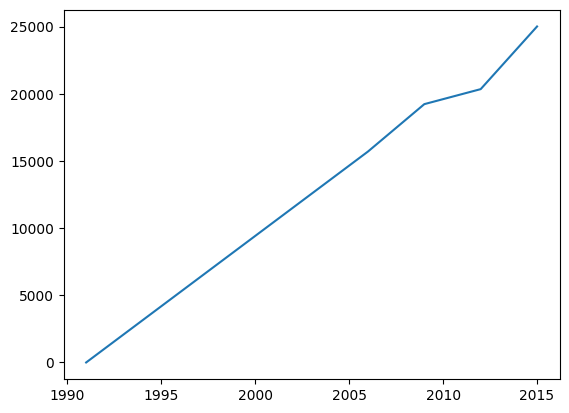

In [22]:
xs = df['year'].unique()
ys = df[(df['variable'] == 'Annual Per Capita Poverty Threshold (in Pesos)') & (df['province'] == '1st District') & (df['region'] == 'NCR')]['value']
plt.plot(xs, ys)
plt.show()
# ys